**Práctica ADNE: TEXTO**

*  Marta Álvarez Fernández
*  Ana Vera Peña
*  Leticia Cólogan Valero





The dataset under discussion contains information about different drugs and their effectiveness in the treatment of various medical conditions, scored by a rating. This database, obtained from Kaggle, consists of 161,297 records and 7 columns, including the name of the drug, the condition treated, a patient review, the rating given, the date of the review and the number of useful votes each review has received.

One of the main objectives of this analysis is to process the text of the reviews to identify patterns and trends in patients' perceptions of the drugs. This will allow us to rank drugs according to diagnoses and effectiveness in patients and, subsequently, to develop a recommendation system that will help physicians select the most appropriate treatment according to the patient's condition.

To achieve this, we will apply natural language processing (NLP) and machine learning techniques, which will allow us to extract relevant information from the comments and assign appropriate classifications. Through this approach, we seek to facilitate medical decision making, optimize treatments and improve patients' experience with prescribed medications.


The dataset has been obtained from: https://www.kaggle.com/datasets/engsaiedali/drugscomtrain-raw

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploratory Data Analysis (EDA)**

In [ ]:
# Cargar el archivo CSV en Google Colab
df = pd.read_csv("/content/drive/MyDrive/drugsComTrain_raw.csv")

In [ ]:
# Mostrar información del dataset
print(df.info())

# Mostrar las primeras filas
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB
None


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# Calculamos la cantidad de valores nulos
total_nulos = df.isnull().sum().sum()
print(f"Total de valores nulos: {total_nulos}")

#se eliminan celdas con la condición NULA para un mejor análisis
df.dropna(inplace=True)
df.info()

Total de valores nulos: 899
<class 'pandas.core.frame.DataFrame'>
Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ MB


# Visualization of the Dataset

An analysis of the dataset will be carried out in order to better understand its structure and content.

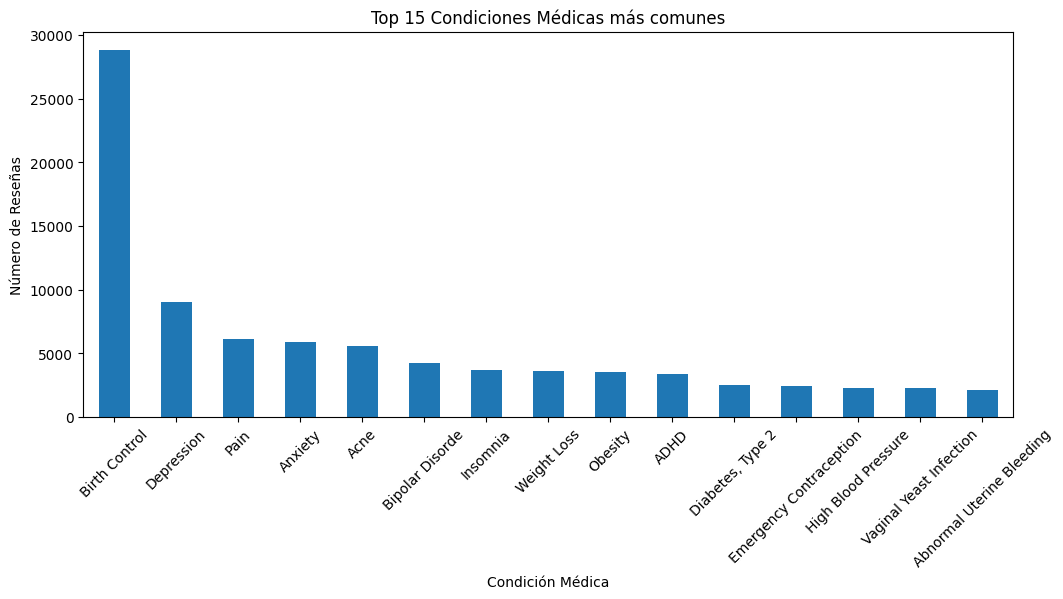

In [ ]:
# Conteo de condiciones más comunes
plt.figure(figsize=(12, 5))
df['condition'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Condiciones Médicas más comunes")
plt.xlabel("Condición Médica")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=45)
plt.show()

From the following graph we can draw several conclusions about the most common medical conditions in the dataset:

1. Contraception ("Birth Control") completely dominates with almost 30,000 reviews, suggesting that users are very active in sharing experiences related to this topic.
2. Depression is the second most commented condition, revealing a high level of interaction of mental health medications.
Psychological conditions such as Anxiety, Bipolar Disorder or Insomnia also have many reviews.



In [ ]:
n_medicamentos = df['drugName'].nunique()
print(f"Número de medicamentos únicos en el dataset: {n_medicamentos}")

Número de medicamentos únicos en el dataset: 3431


Our dataset is composed of 3431 drugs, which makes us consider some dimensionality reduction technique in the case of training an algorithm to classify according to drug.

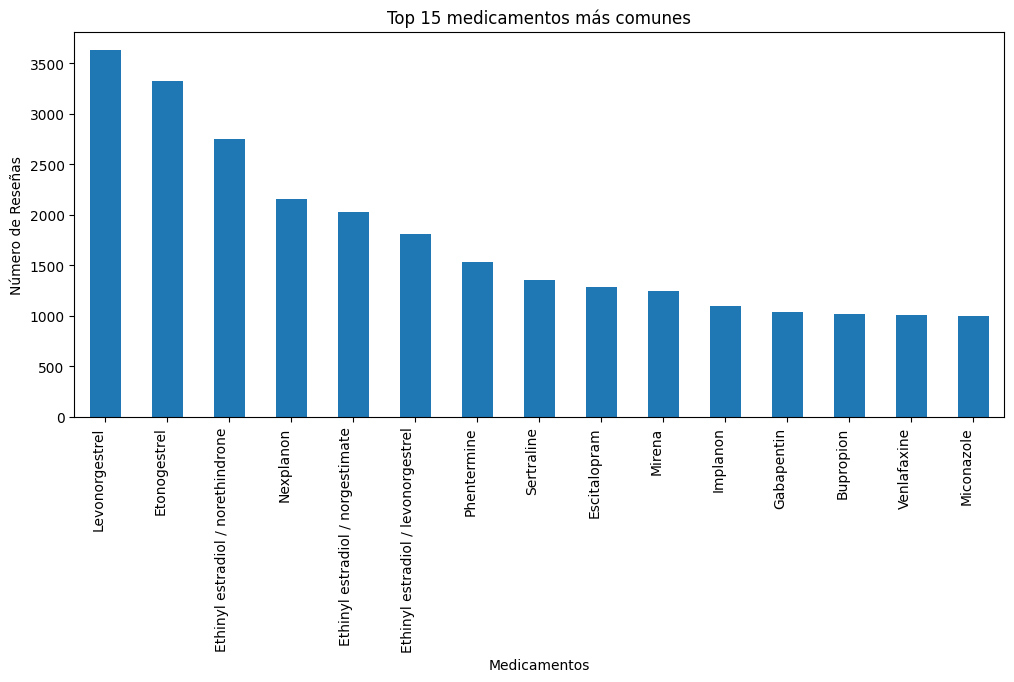

In [ ]:
# Conteo de medicamentos más comunes
plt.figure(figsize=(12, 5))
df['drugName'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 medicamentos más comunes")
plt.xlabel("Medicamentos")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=90, ha = 'right')
plt.show()

  The most consumed drugs, according to the graph, correspond mostly to hormonal contraceptives. Among them:

- Levonorgestrel
- Etonogestrel
- Ethinyl estradiol/norethindrone
- Nexplanon (etonogestrel subdermal implant)
- Ethinyl estradiol/norgestimate


These drugs are mainly used in pregnancy prevention, both in daily use formulations (oral combinations) and in long-term methods (implants or intrauterine devices).

Next, antidepressants and anxiolytics stand out, such as

 - Sertraline and Escitralopram: selective serotonin reuptake inhibitors (SSRIs) commonly prescribed for the treatment of depressive disorders, anxiety disorders and obsessive-compulsive disorder.

- Gabapentin: initially developed as an antiepileptic, it is frequently prescribed for the treatment of neuropathic pain and, in some cases, for anxiety disorders.

- Bupropion: acts on the reuptake of dopamine and norepinephrine, being useful in the treatment of depression and as an aid for smoking cessation.

- Venlafaxine: belongs to the class of serotonin and norepinephrine reuptake inhibitors (SNRIs) and is used in cases of major depression and generalized anxiety.

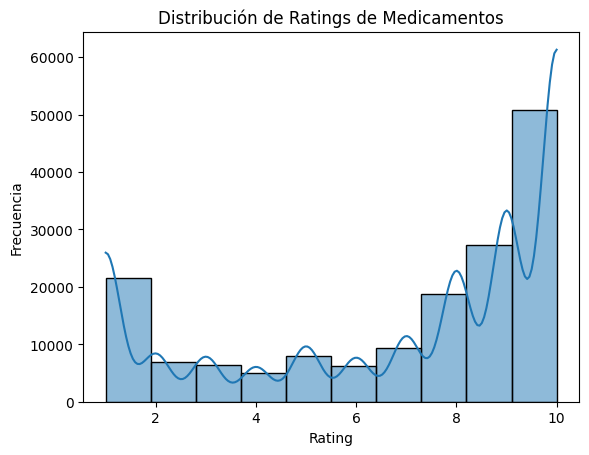

In [ ]:
# Distribución de ratings
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribución de Ratings de Medicamentos")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

The graph shows a skewed distribution to the right, indicating a high concentration of very positive reviews. There is also a peak at 1 which means that some drugs also receive negative reviews which may be due to side effects, lack of effectiveness or bad personal experiences.

<ipython-input-10-bfa4befabbe5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')


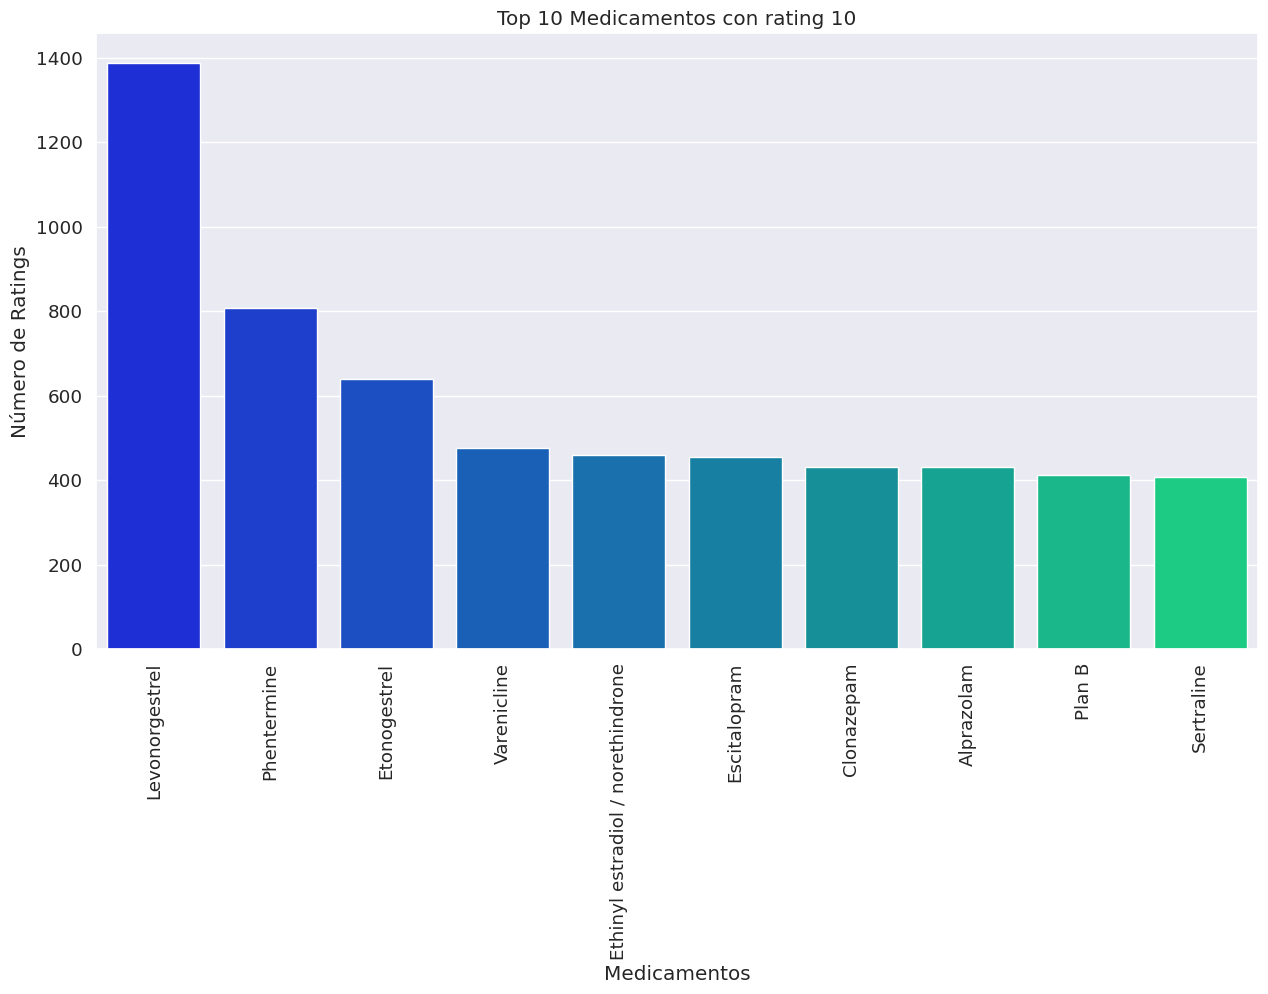

In [ ]:
# This barplot shows the Top 10 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set_title('Top 10 Medicamentos con rating 10')
sns_rating.set_ylabel("Número de Ratings")
sns_rating.set_xlabel("Medicamentos")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

It is interesting, not only to know which are the most popular medications, but also those that have really been effective for our patients and therefore rated 10.

In general, there is a strong representation of hormonal contraceptives, as well as psychotropic drugs widely used in the treatment of mood and anxiety disorders.

- Levonorgestrel: Widely prescribed emergency contraceptive.

- Phentermine: Anorexigenic agent used in the management of obesity. Rapid and effective weight loss in selected patients, especially when combined with diet and exercise.

- Etonogestrel: Active ingredient in the subdermal contraceptive implant (Nexplanon). It receives high ratings for its prolonged efficacy (up to 3 years), convenience in use and low failure rate, representing an effective and discreet option for many patients.

- Varenicline: Smoking cessation medication. High effectiveness in reducing craving and improving quit rate, especially in combination with behavioral interventions.

- Ethinyl estradiol / Norethindrone: Hormonal combination used in oral contraceptives. Positively valued for its efficacy in preventing pregnancy, as well as for its ability to regulate the menstrual cycle and improve conditions such as acne or dysmenorrhea.


<ipython-input-11-052369a8a82d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')


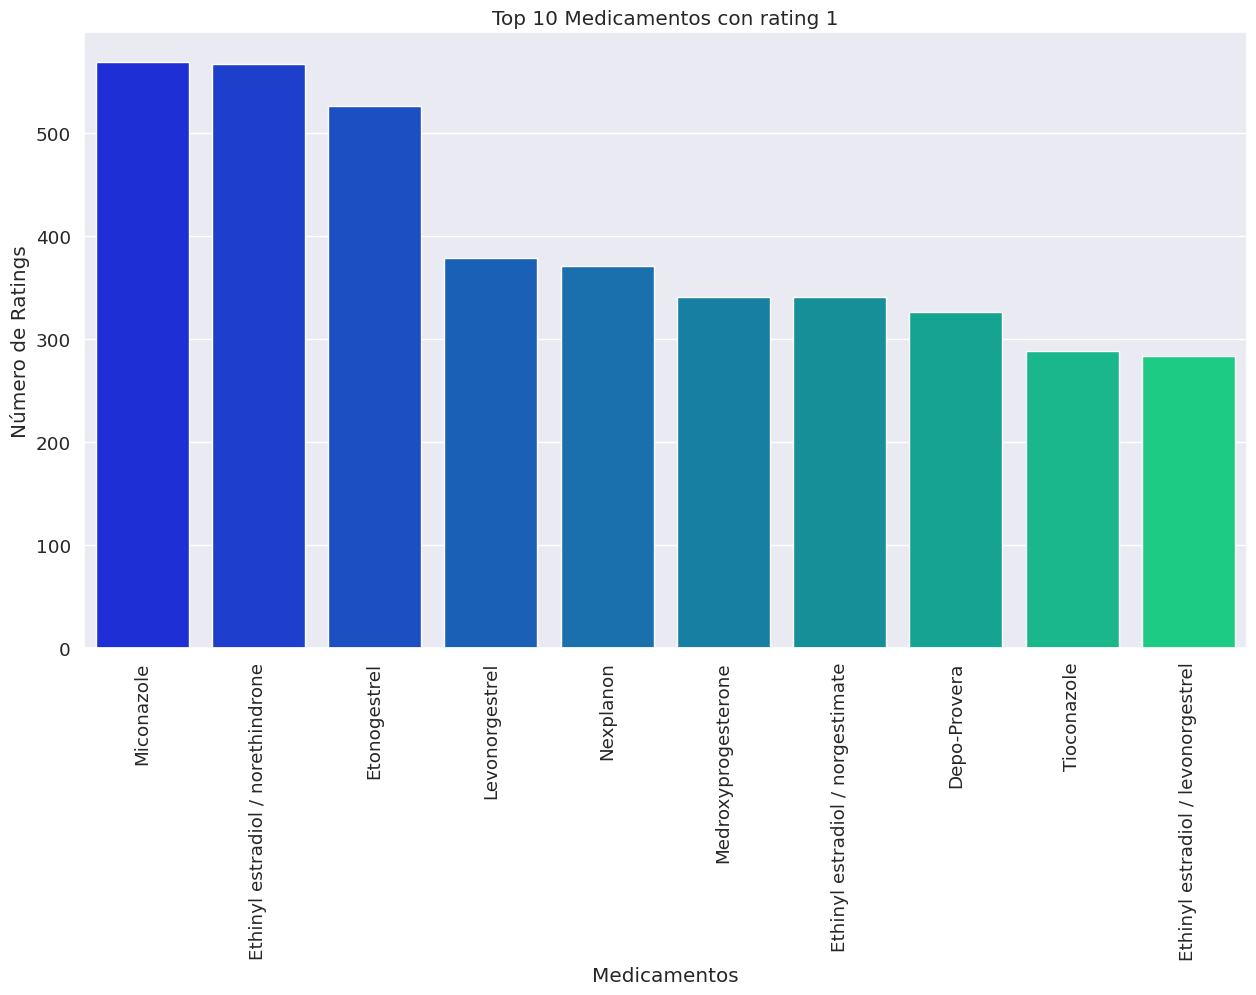

In [ ]:
# This barplot shows the Top 10 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set_title('Top 10 Medicamentos con rating 1')
sns_rating.set_ylabel("Número de Ratings")
sns_rating.set_xlabel("Medicamentos")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


On the other hand, we also studied which drugs have produced the worst results in our patients, being valued with the minimum score rating=1. Most of them are related to reproductive and gynecological health, highlighting hormonal contraceptives and antifungal drugs. The following is a professional description of the main drugs identified:

- Miconazole: Antifungal for topical and/or vaginal use, indicated primarily for Candida infections (candidiasis). Although generally effective, it has received negative reviews due to the appearance of undesirable side effects in some users, such as irritation or allergic reactions, which has generated discomfort in its prolonged use.

- Ethinyl estradiol / Norethindrone: Common hormonal combination in oral contraceptives. Negative ratings are mainly due to side effects such as mood swings, nausea and weight gain. Although effective in preventing pregnancy, some patients report adverse effects that affect their quality of life.

- Etonogestrel: Progestogen used in the subdermal contraceptive implant (Nexplanon). Although it has a high efficacy rate, many users have expressed concerns about long-term side effects, such as irregular bleeding and mood changes, which has lowered its rating.

- Levonorgestrel: Progestogen present in multiple contraceptive formulations, including emergency pills and intrauterine devices (IUDs). Negative ratings are primarily due to side effects, such as weight gain, headaches, and menstrual cycle changes, which has led some patients to discontinue use.

- Nexplanon: Brand name of etonogestrel subdermal implant. Although highly effective, users have reported side effects such as irregular bleeding and pain at the implantation site. In addition, the need for medical intervention for insertion and removal has also been a contributing factor to its negative ratings.



<ipython-input-12-e399dc5c919c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # errors='coerce' convierte errores a NaT


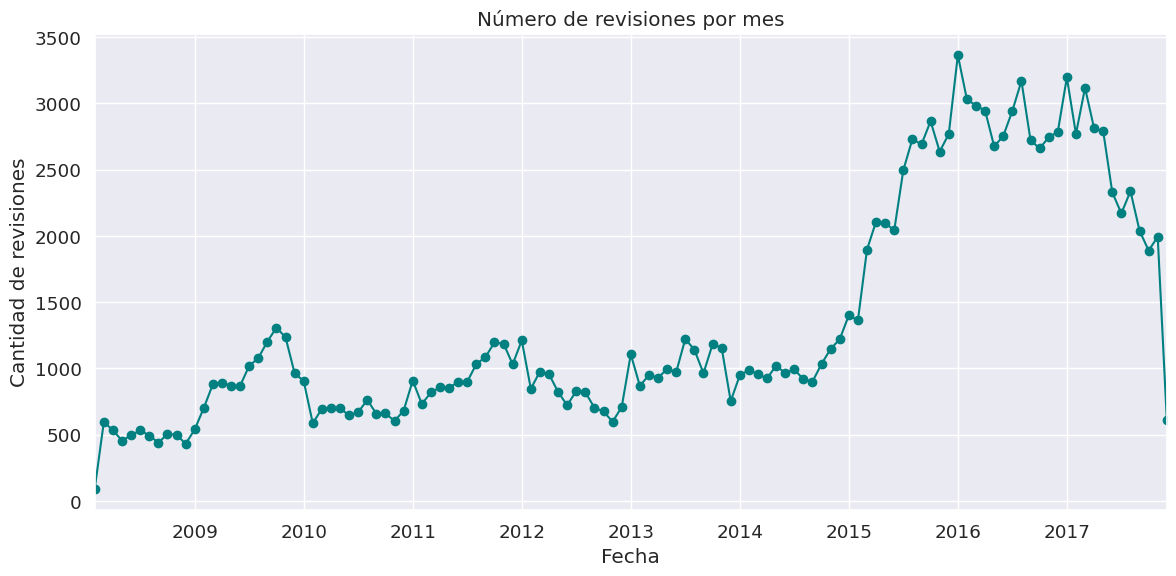

In [ ]:
# Convertir la columna 'date' al tipo datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # errors='coerce' convierte errores a NaT

# Eliminar filas con fechas no válidas
df = df.dropna(subset=['date'])

# Agrupar por mes y contar el número de reseñas
reviews_per_month = df.groupby(df['date'].dt.to_period('M')).size()

# Convertir PeriodIndex a datetime para graficar
reviews_per_month.index = reviews_per_month.index.to_timestamp()

# Graficar
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', marker='o', color='teal')
plt.title('Número de revisiones por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de revisiones')
plt.grid(True)
plt.tight_layout()
plt.show()

In view of the graph above it appears that our dataset collects reviews from 2008 to 2018. It would be interesting once the models have been trained to extend our dataset and see the fit of the models, especially given the variation in the components of the drugs and the withdrawal or placing on the market of new drugs.

# Visualization of the Reviews

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convertir a minúsculas
        text = re.sub(r'\d+', '', text)  # Eliminar números
        text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
        words = word_tokenize(text)  # Tokenizar palabras
        # Lematizar, eliminar stopwords y palabras con menos de 3 letras
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
        return " ".join(words)
    return ""

df['clean_review'] = df['review'].apply(clean_text)

# Mostrar resultados antes y después de la limpieza
df[['review', 'clean_review']].head()

,review,clean_review
0,"""It has no side effect, I take it in combinati...",side effect take combination bystolic fish oil
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...
2,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,"""This is my first time using any form of birth...",first time using form birth control glad went ...
4,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...


In [ ]:
df['clean_review'].head(20)

,clean_review
0,side effect take combination bystolic fish oil
1,son halfway fourth week intuniv became concern...
2,used take another oral contraceptive pill cycl...
3,first time using form birth control glad went ...
4,suboxone completely turned life around feel he...
5,day started work rock hard erection however ex...
6,pulled cummed bit took plan hour later took pr...
7,abilify changed life hope zoloft clonidine fir...
8,nothing problem keppera constant shaking arm a...
9,pill many year doctor changed chateal effectiv...


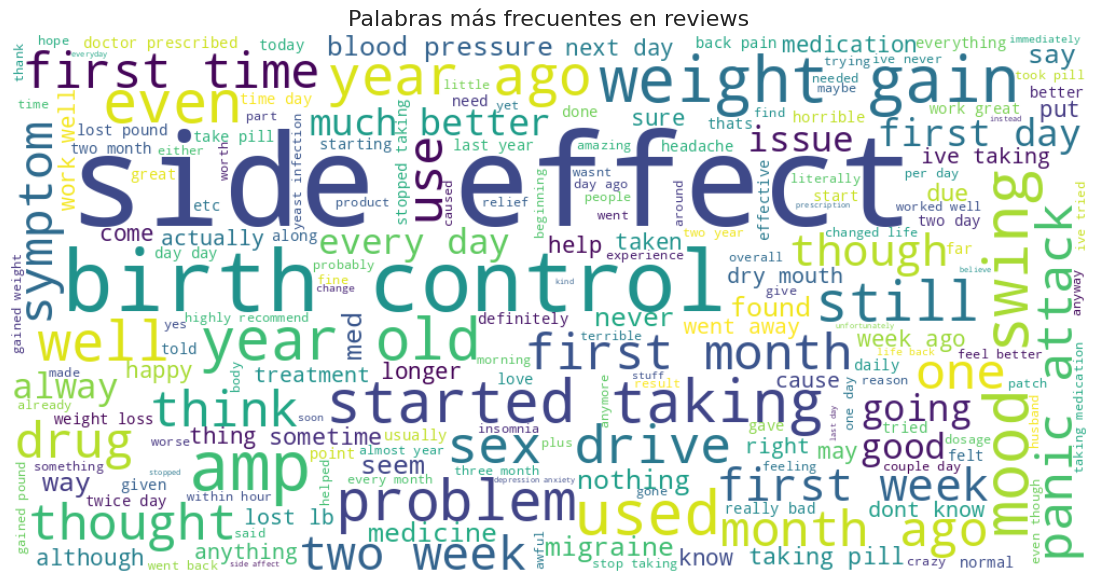

In [ ]:
# Mostrar una nube de palabras para visualizar términos frecuentes
text_all = " ".join(df['clean_review'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_all)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en reviews', fontsize=16)
plt.show()

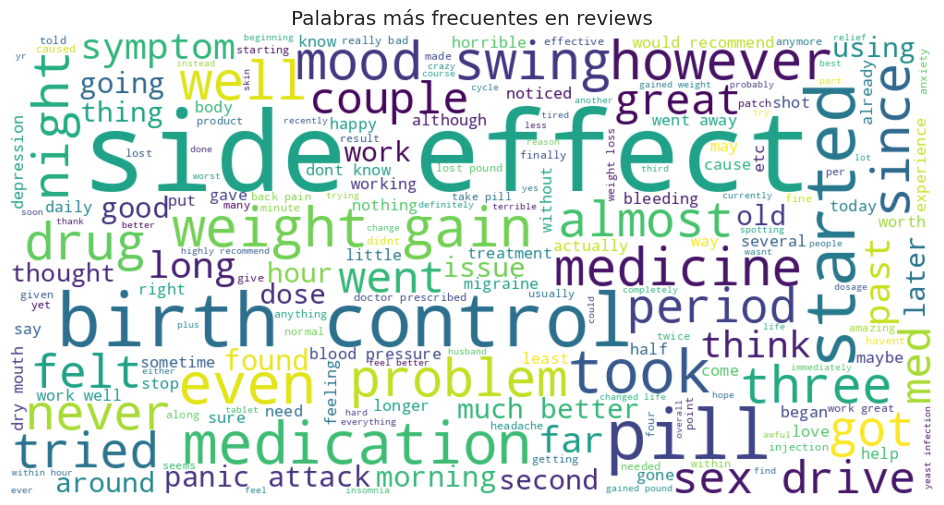

In [ ]:
# Eliminamos palabras para mejorar la nube que hemos obtenido

custom_stopwords = set([
    "use", "used", "taking", "taken", "day", "week", "month", "year", "ago",
    "mg", "lb", "ive", "im", "thats", "also", "though", "first", "last",
    "next", "two", "one", "every", "still", "always", "amp","due", "time", "like", "seem", "start", "end", "stopped"
])

# Concatenar texto limpio para la nube de palabras
text_data = " ".join(df["clean_review"])

# Crear la nube de palabras con filtros adicionales
wordcloud = WordCloud(width=1000, height=500, stopwords=custom_stopwords, background_color="white").generate(text_data)

# Mostrar la nube de palabras mejorada
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más frecuentes en reviews")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Usar una muestra para hacerlo más rápido
sample_reviews = df['clean_review'].dropna().sample(5000, random_state=42)

In [ ]:
# 1. Bag of Words (CountVectorizer)
count_vect = CountVectorizer(max_features=50)
bow_matrix = count_vect.fit_transform(sample_reviews)
bow_words = count_vect.get_feature_names_out()

In [ ]:
# 2. TF-IDF
tfidf_vect = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vect.fit_transform(sample_reviews)
tfidf_words = tfidf_vect.get_feature_names_out()

In [ ]:
# Frecuencia de palabras con Bag of Words
word_freq = bow_matrix.toarray().sum(axis=0)
bow_df = pd.DataFrame({'word': bow_words, 'count': word_freq}).sort_values(by='count', ascending=False)

In [ ]:
# Lista ampliada de palabras irrelevantes
irrelevant_words = {
    "day", "month", "year", "week", "time", "taking", "like", "would", "ive", "take", "first", "get",
    "side", "one", "two", "took", "got", "also", "much", "still", "since",
    "hour", "night", "really", "better", "never", "every", "even", "felt", "well", "went"
}

# Filtrar el DataFrame
filtered_bow_df = bow_df[~bow_df["word"].isin(irrelevant_words)]

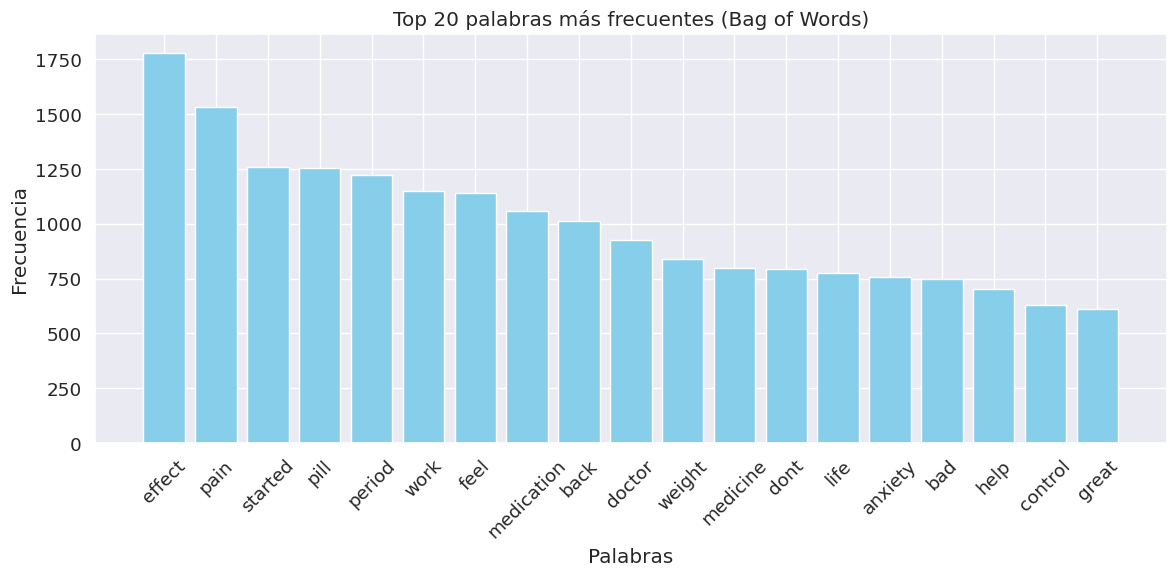

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_bow_df['word'], filtered_bow_df['count'], color='skyblue')
plt.title('Top 20 palabras más frecuentes (Bag of Words)')
plt.xticks(rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

This visualization of the Reviews does not provide us with much information. In spite of the previous cleaning, we found the repetition of many words such as effect, pain, pill...

# Clustering

In [ ]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

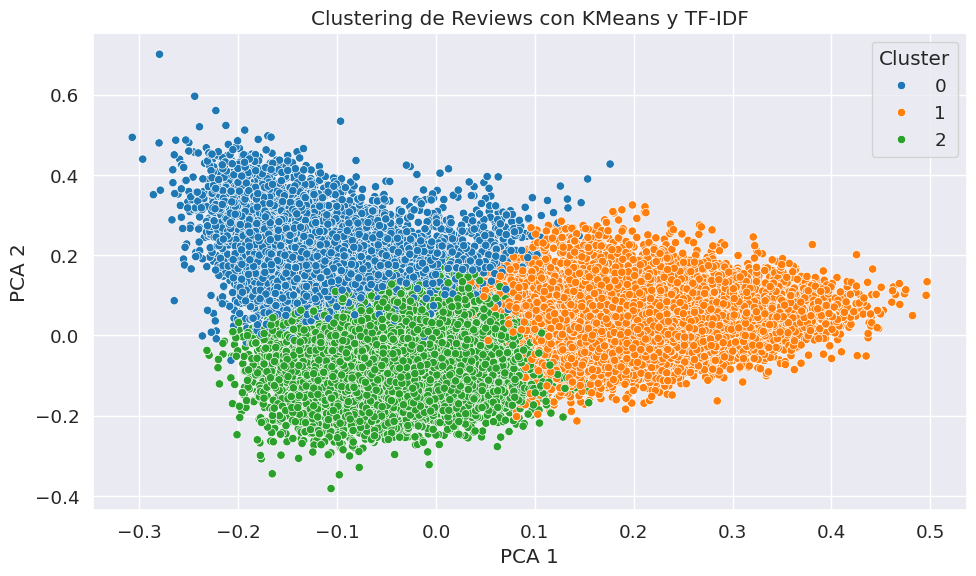

In [ ]:
# Usar la matriz TF-IDF ya generada
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vect.fit_transform(df['clean_review'])

# Aplicar KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Reducir dimensionalidad para visualizar
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Crear DataFrame para graficar
cluster_df = pd.DataFrame({
    'x': reduced_data[:, 0],
    'y': reduced_data[:, 1],
    'cluster': labels
})

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='x', y='y', hue='cluster', palette='tab10')
plt.title('Clustering de Reviews con KMeans y TF-IDF')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# Obtener los términos (palabras) del vocabulario TF-IDF
terms = tfidf_vect.get_feature_names_out()

# Componentes principales de PCA
n_componentes = 2
for i in range(n_componentes):
    component = pca.components_[i]
    indices = component.argsort()[::-1][:10]  # Top 10 términos más influyentes
    top_terms = [(terms[index], component[index]) for index in indices]
    print(f"\nTop términos para PCA componente {i + 1}:")
    for term, score in top_terms:
        print(f"{term}: {score:.4f}")



Top términos para PCA componente 1:
period: 0.4253
month: 0.2712
pill: 0.2666
birth: 0.2199
control: 0.2055
weight: 0.1606
ive: 0.1543
acne: 0.1502
bleeding: 0.1475
cramp: 0.1190

Top términos para PCA componente 2:
pain: 0.7033
period: 0.1518
day: 0.1188
back: 0.1039
cramp: 0.0911
hour: 0.0869
relief: 0.0843
pill: 0.0771
bleeding: 0.0705
took: 0.0675


In [ ]:
import numpy as np

# Para cada cluster, obtenemos el centroide y los términos más importantes
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTérminos más representativos por cluster:")
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_words))



Términos más representativos por cluster:

Cluster 0:
pain, day, back, take, relief, year, medicine, taking, work, severe

Cluster 1:
period, pill, month, birth, control, ive, bleeding, day, weight, week

Cluster 2:
day, effect, year, side, work, taking, week, take, medication, time


- **Cluster 0:** The most representative terms of this cluster are: pain, day, back, take, relief, year, medicine, taking, work, severe.

  This cluster is mainly related to chronic or severe pain. Patients in this cluster are likely experiencing intense or ongoing pain (such as back pain or severe pain) and are seeking relief through medication. They are likely discussing treatments for long-term painful conditions, such as pain associated with arthritis, fibromyalgia, or chronic injuries.

  In addition, the use of medications over time and preoccupation with work may suggest that these patients have difficulty managing their symptoms as they go about their daily activities. It could be related to diseases such as Pain.

- **Cluster 1:** The most representative terms in this cluster are: period, pill, month, birth, control, ive, bleeding, day, weight, week.

  This cluster is clearly related to contraceptives and menstrual problems. Patients in this cluster are likely to be discussing birth control (especially birth control pills), and related side effects, such as irregular bleeding, weight gain, or irregular menstrual cycles. This may also include patients discussing contraceptive side effects, such as bleeding between periods or changes in their body weight.

  This group is strongly related to Birth Control and Abnormal Uterine Bleeding conditions. These are likely to be patients who are using or considering hormonal contraceptives and have concerns about their impact on their body.

- **Cluster 2:** The most representative terms of this cluster are: day, effect, year, side, work, taking, week, take, medication, time.

  This cluster appears to be related to medication side effects. Patients in this cluster are probably discussing the adverse reactions they experience with the use of different drugs. They may be dealing with effects such as fatigue, mood changes, or gastrointestinal problems, which are common with many long-term treatments.
  
  This cluster could be associated with conditions such as Depression, Anxiety, or Insomnia, where patients may be taking medication to treat symptoms, but worry about side effects affecting their daily lives. Mentions of work and time suggest that these side effects may be interfering with their ability to perform daily activities.



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
#LDA

# Reducimos un poco más el número de features para hacerlo manejable
tfidf_vect_lda = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english', max_features=500)
tfidf_matrix_lda = tfidf_vect_lda.fit_transform(sample_reviews)

# Aplicar LDA (Latent Dirichlet Allocation)
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(tfidf_matrix_lda)

# Obtener top palabras por tema
def display_topics(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics.append((f"Tema {topic_idx+1}", top_words))
    return pd.DataFrame(topics, columns=["Tema", "Palabras Principales"])

lda_topics_df = display_topics(lda_model, tfidf_vect_lda.get_feature_names_out(), 10)

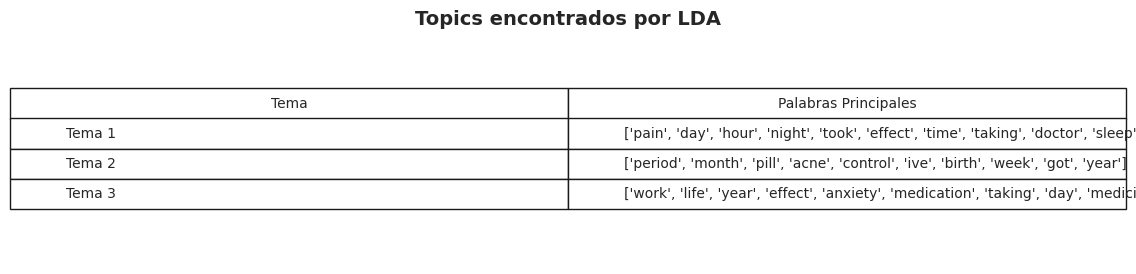

In [ ]:
# Crear una tabla visual
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table_data = lda_topics_df.values.tolist()
table = ax.table(cellText=table_data, colLabels=lda_topics_df.columns, cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)
plt.title("Topics encontrados por LDA", fontweight='bold', fontsize=14)
plt.show()

In [ ]:
# Obtener la distribución de temas para cada documento
topic_distributions = lda_model.transform(tfidf_matrix_lda)

# Asignar el tema dominante a cada review
dominant_topics = np.argmax(topic_distributions, axis=1)

# Agregar columna de tema al DataFrame
sample_reviews_df = pd.DataFrame({'review': sample_reviews.values, 'topic': dominant_topics})

# Tomar ejemplos representativos por tema
example_reviews = sample_reviews_df.groupby('topic').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)

# Mostrar ejemplos por tema
example_reviews_sorted = example_reviews.sort_values(by='topic')
example_reviews_sorted.head(10)  # Mostrar solo los primeros 10 para que no sea tan largo


<ipython-input-33-ace0cbbf97ee>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  example_reviews = sample_reviews_df.groupby('topic').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)


,review,topic
0,second time trying chantix dont think ready qu...,0
1,used take hydrochlorothiazide alone maxzide ni...,0
2,pill month made appointment doctor asked switc...,1
3,paragard iud seven year first period really to...,1
4,work well migraine first couple time taking ca...,2
5,pritiq month going pretty good say went trip f...,2


<ipython-input-34-8d7840fea2b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_by_topic, x='topic', y='mean', palette='coolwarm')


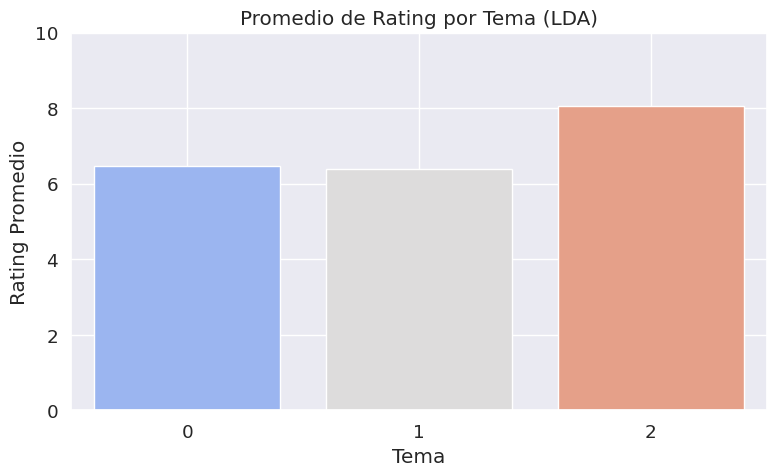

,topic,mean,count
0,0,6.476791,1982
1,1,6.394188,1342
2,2,8.065632,1676


In [ ]:
# Unir temas con ratings (necesitamos los índices originales)
sample_indices = sample_reviews.index
df_sample_with_topics = df.loc[sample_indices].copy()
df_sample_with_topics['topic'] = dominant_topics

# Calcular promedio de rating por tema
ratings_by_topic = df_sample_with_topics.groupby('topic')['rating'].agg(['mean', 'count']).reset_index()

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(data=ratings_by_topic, x='topic', y='mean', palette='coolwarm')
plt.title('Promedio de Rating por Tema (LDA)')
plt.xlabel('Tema')
plt.ylabel('Rating Promedio')
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.show()

ratings_by_topic

In [ ]:
# Asociar los nombres de medicamentos con los temas dominantes
df_sample_with_topics['drugName'] = df.loc[sample_indices, 'drugName'].values

# Agrupar por tema y obtener los medicamentos más comunes en cada uno
top_drugs_by_topic = (
    df_sample_with_topics.groupby('topic')['drugName']
    .apply(lambda x: x.value_counts().head(5))
    .reset_index(name='count')
)

top_drugs_by_topic

,topic,level_1,count
0,0,Miconazole,30
1,0,Magnesium sulfate / potassium sulfate / sodium...,26
2,0,Metronidazole,22
3,0,Nitrofurantoin,21
4,0,Tramadol,21
5,1,Levonorgestrel,105
6,1,Etonogestrel,98
7,1,Ethinyl estradiol / norethindrone,80
8,1,Nexplanon,76
9,1,Ethinyl estradiol / norgestimate,57


**Cluster 0**: Weight Loss and Metabolic Health Medications

Medications: Phentermine, Bupropion / Naltrexone, Magnesium sulfate / potassium sulfate / sodium, Miconazole, Contrave

This group is related to obesity or weight loss treatments, such as Phentermine and Contrave, which are commonly used to control appetite and promote weight loss. Magnesium sulfate may be related to bowel preparation or laxatives. Miconazole (although generally used as an antifungal) and Bupropion / Naltrexone have applications outside of obesity treatment, but may be grouped here by coincidence in the analysis.

**Cluster 1**: Contraceptives and Reproductive Health

Medications: Levonorgestrel, Etonogestrel, Ethinyl estradiol / norethindrone, Nexplanon, Ethinyl estradiol / norgestimate

This group is clearly related to contraceptives and reproductive health. It includes pregnancy prevention drugs such as Levonorgestrel (included in IUD and emergency pill), Etonogestrel (contraceptive implant), and combinations of estrogens and progestins in oral contraceptive pills.

**Cluster 2**: Mood and Anxiety Disorders

Medications: Sertraline, Lexapro, Escitalopram, Alprazolam, Zoloft

This cluster is related to antidepressants and anxiolytic medications. SSRIs such as Sertraline, Lexapro, and Escitalopram are common for treating depression and anxiety, while Alprazolam and Zoloft are also used for anxiety and generalized anxiety disorder.



# Classification Section:

Our objective is to extract the "sentiments" associated with the reviews. For this purpose we will consider a review as positive when the patient has indicated a rating higher than 7, while it will be negative when this does not occur.

We will test:

- Machine Learning Models: Logistic Regression, SVM, Random Forest, Naive Bayes

- Textblob Model

- Machine Learning LightGBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       613
           1       0.76      0.74      0.75       587

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



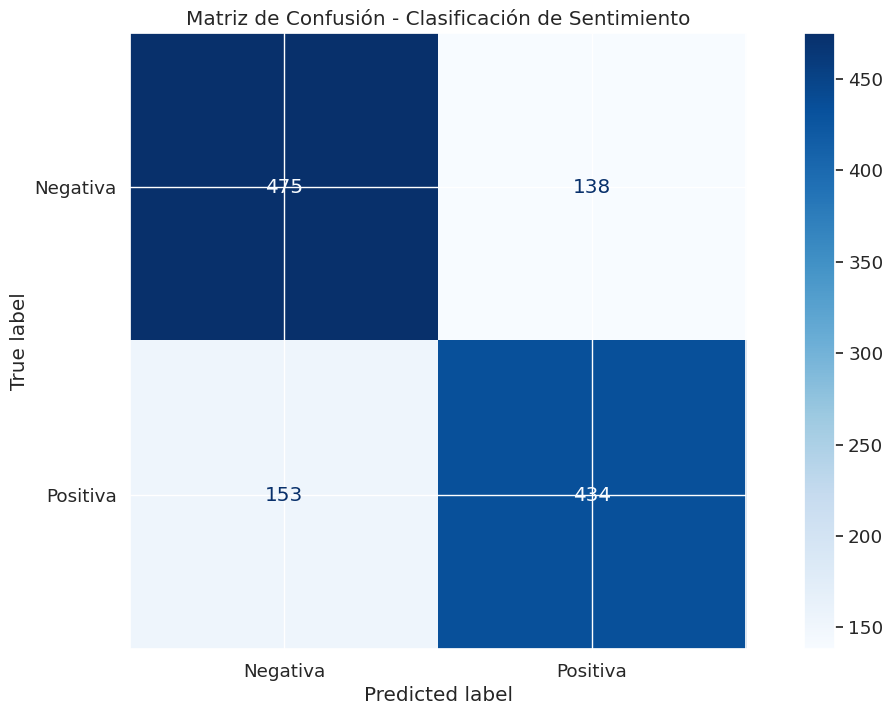

In [ ]:
# Crear etiquetas: 1 = positiva (rating >= 7), 0 = negativa
df['label'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)

# Usar una muestra balanceada
df_class = df[['clean_review', 'label']].dropna()
df_sample = df_class.groupby('label').sample(n=3000, random_state=42)
X = df_sample['clean_review']
y = df_sample['label']

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativa", "Positiva"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Clasificación de Sentimiento")
plt.show()

The model shows a fairly balanced performance between positive and negative reviews, with precision, recall, and F1-score around 75–77% for both categories. This suggests that the model is doing a good job at predicting both negative and positive evaluations. An accuracy of 0.76 further supports this reasonably strong performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Reducida preparación de datos para los 4 modelos
df['label'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)
df_class = df[['review', 'label']].dropna().copy()

# Usamos una muestra balanceada
df_sample = df_class.groupby('label').sample(n=3000, random_state=42)
df_sample['clean_review'] = df_sample['review'].apply(clean_text)
X = df_sample['clean_review']
y = df_sample['label']

# Vectorización
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "Naive Bayes": MultinomialNB()
}

# Entrenar y evaluar todos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

In [ ]:
print(results)

{'Logistic Regression': {'accuracy': 0.7575, 'precision': 0.7575296478998708, 'recall': 0.7575, 'f1-score': 0.7573963112494516}, 'Random Forest': {'accuracy': 0.7475, 'precision': 0.7480264246734657, 'recall': 0.7475, 'f1-score': 0.7471246638013923}, 'SVM': {'accuracy': 0.7508333333333334, 'precision': 0.750834117212692, 'recall': 0.7508333333333334, 'f1-score': 0.7507455131427014}, 'Naive Bayes': {'accuracy': 0.7433333333333333, 'precision': 0.7433812329996471, 'recall': 0.7433333333333333, 'f1-score': 0.743349023792256}}


**Logistic Regression**

The Logistic Regression model demonstrated the best overall performance, with an accuracy of 75.75%. This means the model correctly classified 75.75% of the samples in the test set. Additionally, both its precision and recall were 75.75%, indicating that 75.75% of all positive predictions were correct, and 75.75% of all actual positive reviews were correctly identified. The F1-score, which reflects the balance between precision and recall, was 0.7574—a high value that indicates strong overall performance.

**Random Forest**

The Random Forest model achieved an accuracy of 73.42%, placing it slightly behind Logistic Regression in terms of performance. Precision was 73.44%, while recall reached 73.42%. The F1-score was 0.7339, suggesting that although the model is effective, its performance is slightly lower than that of Logistic Regression. Nevertheless, it remains a solid model for this type of classification task.

**Support Vector Machines (SVM)**

The SVM model reached an accuracy of 75.08%, which is very close to that of Logistic Regression. Both precision and recall were 75.08%, demonstrating that the model performed well in classifying positive reviews. The F1-score was 0.7507, indicating a good balance between precision and recall, although slightly below the score achieved by Logistic Regression.

**Naive Bayes**

The Naive Bayes model showed lower performance compared to the others, with an accuracy of 74.33%. Precision and recall were 74.34% and 74.33%, respectively, and the F1-score was 0.7433. While its performance is acceptable, it was the lowest among all the evaluated models.

It is difficult for us to train the models due to the presence of unknown and strange words. We will further clean the reviews by removing "strange" repeating patterns.

In [ ]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
df['clean_review_1'] = review_clean(df['clean_review'])

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
df['clean_review_1'] = df['clean_review_1'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df['clean_review_1'] = df['clean_review_1'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
df['sentiment'] = sentiment(df['review'])

In [ ]:
df['sentiment_clean'] = sentiment(df['clean_review_1'])

In [ ]:
# Clasificación automática con TextBlob
df['predicted_sentiment'] = df['sentiment_clean'].apply(lambda x: 'positivo' if x >= 0 else 'negativo')
# Clasificación real
df['real_sentiment'] = df['rating'].apply(lambda x: 'positivo' if x >= 7 else 'negativo')

# Comparar
df['coincide'] = df['real_sentiment'] == df['predicted_sentiment']
accuracy = df['coincide'].mean()

print(f"Precisión del sentimiento automático respecto al rating: {accuracy:.2%}")

Precisión del sentimiento automático respecto al rating: 63.91%


TextBlob is a very simple tool: it uses basic dictionary-based rules to determine polarity. It does not take context, irony, or sarcasm into account. In our case, since the reviews come from patients describing numerous side effects and variations in treatment effectiveness over time, it fails to fully grasp the context of the message and therefore struggles to classify it correctly.

In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient. It offers several advantages, such as faster training speed and higher efficiency, lower memory usage, better accuracy, and support for parallel and GPU learning. Since it is based on decision tree algorithms, it grows the tree leaf-wise with the best fit.

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df['review_clean_ss'] = review_clean(df['review'])
df['sentiment_clean_ss'] = sentiment(df['review_clean_ss'])

#Word count in each review
df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] = df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df["mean_word_len"] = df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Assuming 'date' is in datetime format or needs conversion
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now extract the day, month, and year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year


# new column review sentiment
df.loc[(df['rating'] >= 7), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 7), 'Review_Sentiment'] = 0
df['Review_Sentiment'].value_counts()

# Defining Features that are significant and splitting the data as train and test set
features = df[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (112278, 15)
The Test set size  (48120, 15)


In [ ]:
df['Review_Sentiment'].value_counts()

,count
Review_Sentiment,
1.0,106310
0.0,54088


In [ ]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8427057356608478
The confusion Matrix is 


array([[11540,  4626],
       [ 2943, 29011]])

We achieved the best result, with an accuracy of 84%.



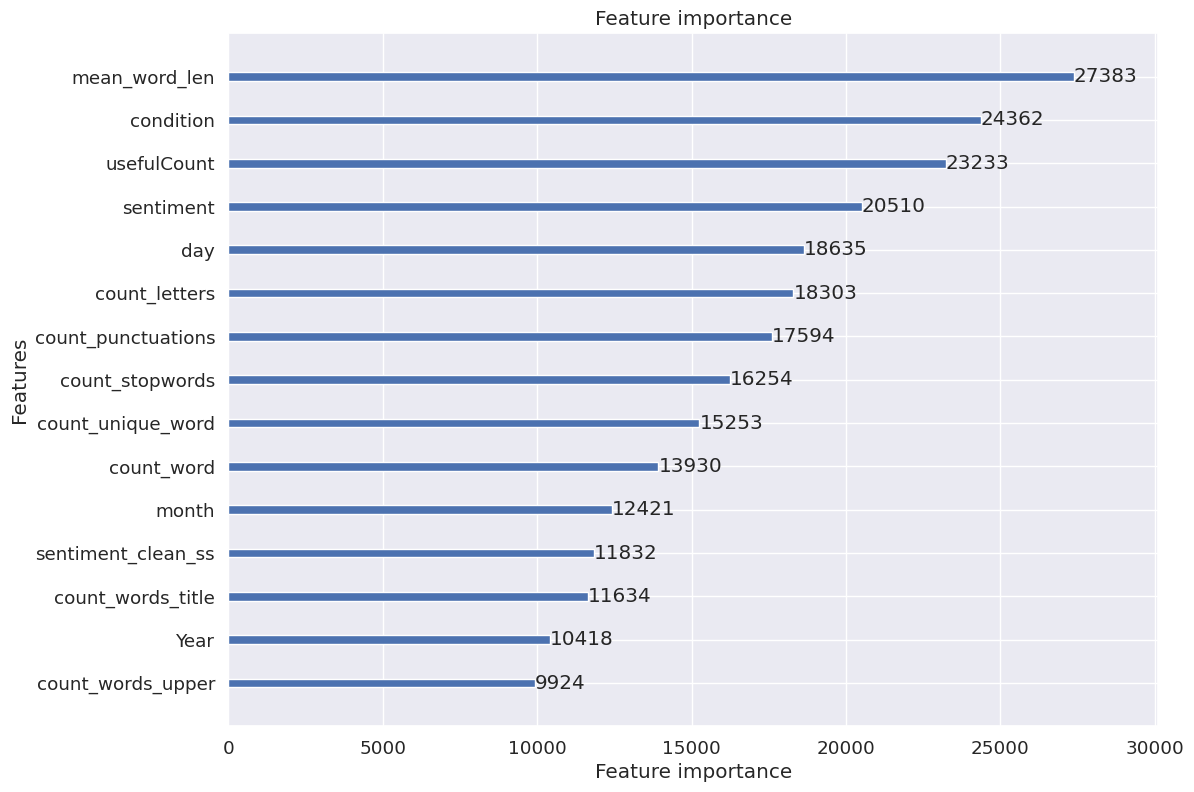

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

We interpret the five most important features:

- mean_word_len (average word length): Reviews with longer words tend to be associated with clearer or more intense sentiments, possibly due to more elaborate or technical language.

- condition (medical condition): Some conditions consistently generate more positive or negative reviews, which gives this variable a strong impact on the prediction.

- usefulCount (number of people who found the review helpful): More useful reviews likely reflect the overall sentiment more accurately, which is why the model relies on this number.

- sentiment (overall sentiment of the text): A pre-calculated measure of the text’s sentiment. It's expected to carry weight, as it summarizes the polarity of the language used.

- day (day of the month): There may be some seasonal or time-related pattern, although in general, this variable is not expected to have much significance.

### Recommender System
Our current goal is to build a model that, given a review, can suggest the appropriate medication for the patient based on their symptoms.

In [ ]:
# Ver el mapeo de etiquetas originales a números para 'condition'
condition_encoder = label_encoder_feat['condition']
for idx, label in enumerate(condition_encoder.classes_):
    print(f"{idx}: {label}")

# 165: Birth Control

0: 0</span> users found this comment helpful.
1: 10</span> users found this comment helpful.
2: 110</span> users found this comment helpful.
3: 11</span> users found this comment helpful.
4: 121</span> users found this comment helpful.
5: 123</span> users found this comment helpful.
6: 12</span> users found this comment helpful.
7: 13</span> users found this comment helpful.
8: 142</span> users found this comment helpful.
9: 145</span> users found this comment helpful.
10: 146</span> users found this comment helpful.
11: 14</span> users found this comment helpful.
12: 15</span> users found this comment helpful.
13: 16</span> users found this comment helpful.
14: 17</span> users found this comment helpful.
15: 18</span> users found this comment helpful.
16: 19</span> users found this comment helpful.
17: 1</span> users found this comment helpful.
18: 20</span> users found this comment helpful.
19: 21</span> users found this comment helpful.
20: 22</span> users found this comment helpful

In [ ]:
df_filtrado = df[df['condition'] == 165]

In [ ]:
num_medicamentos = df_filtrado['drugName'].nunique()
print(f"Número de medicamentos distintos: {num_medicamentos}")


Número de medicamentos distintos: 172


In [ ]:
df_filtrado['drugName_decoded'] = label_encoder_feat['drugName'].inverse_transform(df_filtrado['drugName'])

There are too many medications, so we need to further reduce the sample.

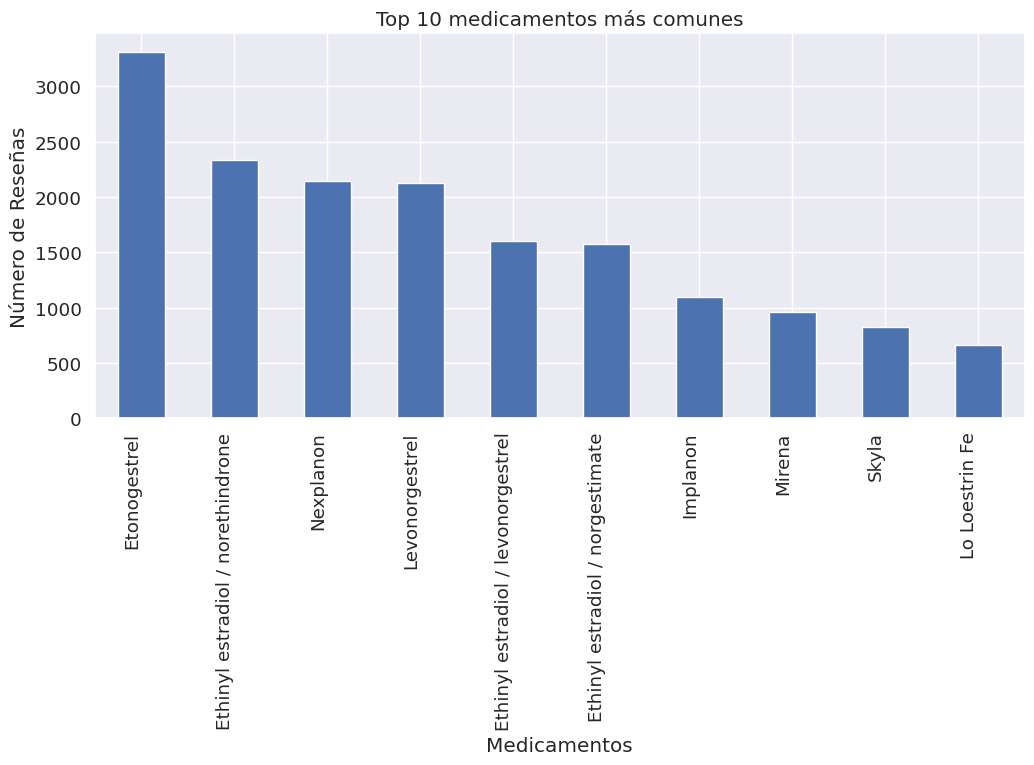

In [ ]:
# Conteo de medicamentos más comunes
plt.figure(figsize=(12, 5))
df_filtrado['drugName_decoded'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 medicamentos más comunes")
plt.xlabel("Medicamentos")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=90, ha = 'right')
plt.show()

Even so, we can focus on the five most frequently mentioned medications.

In [ ]:
import matplotlib.pyplot as plt

# 1. Obtener el top 10 IDs de drugName más frecuentes
top_5_ids = df_filtrado['drugName_decoded'].value_counts().head(5).index

# 2. Filtrar todas las filas que tengan esos drugName (IDs)
df_top_5 = df_filtrado[df_filtrado['drugName_decoded'].isin(top_5_ids)].copy()

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
from sklearn.metrics import accuracy_score
import os
import joblib
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Desactivar Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

# Preparar datos
df = df_top_5[['clean_review', 'drugName_decoded']].copy()
df['clean_review'] = df['clean_review'].astype(str)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['drugName_decoded'])

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

train_ds = Dataset.from_pandas(train_df[['clean_review', 'label']])
test_ds = Dataset.from_pandas(test_df[['clean_review', 'label']])

model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["clean_review"], padding="max_length", truncation=True, max_length=128)

train_ds = train_ds.map(tokenize_function, batched=True)
test_ds = test_ds.map(tokenize_function, batched=True)

num_labels = len(label_encoder.classes_)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    return {"accuracy": accuracy_score(labels, preds)}

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Entrenamiento
trainer.train()

# Accuracy en TRAIN
train_predictions = trainer.predict(train_ds)
train_preds = np.argmax(train_predictions.predictions, axis=1)
train_acc = accuracy_score(train_predictions.label_ids, train_preds)

# Accuracy en TEST
test_predictions = trainer.predict(test_ds)
test_preds = np.argmax(test_predictions.predictions, axis=1)
test_acc = accuracy_score(test_predictions.label_ids, test_preds)

# Mostrar accuracy
print(f"✅ Accuracy en entrenamiento: {train_acc:.4f}")
print(f"✅ Accuracy en test:         {test_acc:.4f}")


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Map:   0%|          | 0/9223 [00:00<?, ? examples/s]

Map:   0%|          | 0/2306 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,0.909300,0.622007,0.701214
2,0.574600,0.584171,0.717259
3,0.480500,0.590362,0.711622


✅ Accuracy en entrenamiento: 0.7509
✅ Accuracy en test:         0.7173


AttributeError: BertTokenizerFast has no attribute texts_to_sequences

In [ ]:
import torch
def predict_medication(text: str, model, tokenizer, label_encoder):
    """
    Predice un medicamento dado un texto usando un modelo BERT.
    Utiliza el tokenizador de Hugging Face en lugar de texts_to_sequences.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # Correcto: usamos el tokenizador directamente
    tokens = tokenizer(text, return_tensors="pt",
                       padding="max_length", truncation=True, max_length=128)
    tokens = {k: v.to(device) for k, v in tokens.items()}

    with torch.no_grad():
        outputs = model(**tokens)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    # Aquí puedes usar el LabelEncoder para transformar el número a la etiqueta original,
    # o un diccionario para mapear el número a un nombre de medicamento.
    try:
        predicted_str = label_encoder.inverse_transform([prediction])[0]
    except Exception:
        predicted_str = f"(Clase {prediction} no reconocida)"

    return predicted_str

# Prueba
new_review = "I want a contraceptive implant that is used to prevent pregnancy in women that has progestin"
predicted_meds = predict_medication(new_review, model, tokenizer, label_encoder)
print("Medicamentos recomendados:", predicted_meds)

Medicamentos recomendados: Etonogestrel


In [ ]:
# Guardar modelo, tokenizer y label encoder
model.save_pretrained("./med_bert_model")
tokenizer.save_pretrained("./med_bert_model")
joblib.dump(label_encoder, "./med_bert_model/label_encoder.pkl")

['./med_bert_model/label_encoder.pkl']

We save the data from our df_top_5 so we can later display the most and least notable reviews, along with additional information, on the website.

In [ ]:
import pandas as pd


# Calcular la media de rating por medicamento
df_media = df_top_5.groupby("drugName_decoded")["rating"].mean().reset_index()
df_media.columns = ["drugName_decoded", "mean_rating"]

# Crear un DataFrame para almacenar las mejores y peores reviews
mejores_peores_reviews = pd.DataFrame()

# Para cada medicamento, extraer 2 reviews con mayor rating y 2 con menor rating
for medicamento in df_top_5["drugName_decoded"].unique():
    # Seleccionar solo las filas correspondientes al medicamento actual
    df_med = df_top_5[df_top_5["drugName_decoded"] == medicamento]

    # Ordenar de mayor a menor rating y tomar las dos mejores
    top_2 = df_med.sort_values("rating", ascending=False).head(2)
    # Ordenar de menor a mayor rating y tomar las dos peores
    bottom_2 = df_med.sort_values("rating", ascending=True).head(2)

    # Combinar las reviews seleccionadas
    seleccionados = pd.concat([top_2, bottom_2])
    mejores_peores_reviews = pd.concat([mejores_peores_reviews, seleccionados])

# Guardar los resultados en archivos CSV
mejores_peores_reviews.to_csv("mejores_peores_reviews.csv", index=False)
df_media.to_csv("media_por_medicamento.csv", index=False)

# Mostrar resumen en pantalla
print("Media por medicamento:")
print(df_media)

print("\nReviews seleccionadas:")
# Mostramos solo las columnas 'drugName_decoded' y 'clean_review'
mejores_peores_reviews = mejores_peores_reviews[['drugName_decoded', 'clean_review']]
print(mejores_peores_reviews)


Media por medicamento:
                     drugName_decoded  mean_rating
0  Ethinyl estradiol / levonorgestrel     5.903125
1   Ethinyl estradiol / norethindrone     5.658537
2                        Etonogestrel     5.808992
3                      Levonorgestrel     7.061062
4                           Nexplanon     5.679851

Reviews seleccionadas:
                          drugName_decoded  \
4688    Ethinyl estradiol / levonorgestrel   
155286  Ethinyl estradiol / levonorgestrel   
160959  Ethinyl estradiol / levonorgestrel   
159917  Ethinyl estradiol / levonorgestrel   
5852                             Nexplanon   
399                              Nexplanon   
8072                             Nexplanon   
8243                             Nexplanon   
754                           Etonogestrel   
1166                          Etonogestrel   
132437                        Etonogestrel   
132724                        Etonogestrel   
1353                        Levonorgestrel   
161

# Generative Section:
The following generative models will be trained. Two different types have been trained:

- A model that summarizes user reviews

- A model that translates reviews into Spanish


**1. Review Summarization**

A summary will be generated from the user reviews to facilitate a quick understanding of the medication being referred to.
The Hugging Face library is used to generate an automatic summary of a text review using the pre-trained model sshleifer/distilbart-cnn-12-6.

In [ ]:
from transformers import pipeline

# Crear el pipeline de resumen usando el modelo preentrenado
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")


long_review = df['review'].dropna().iloc[100]

# Generar el resumen agregando truncation=True para manejar textos muy largos
summary = summarizer(long_review, truncation=True, max_length=60, min_length=20, do_sample=False)

print("Review original:\n", long_review)
print("\nResumen generado:\n", summary[0]['summary_text'])

An interactive interface has been developed where the review we want to summarize can be selected:

In [ ]:
import gradio as gr
from transformers import pipeline

# Crear el pipeline de resumen
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Extraer una lista de reviews (puedes limitarla si hay demasiados)
#reviews_lista = df['review'].dropna().tolist() #si quisieramos entrenar todo nuestro dataset
reviews_lista = df['review'].dropna().tolist()[:200]  #solo los primeros 200

def resumir_review(review):
    # Genera el resumen para el review seleccionado
    summary = summarizer(review, truncation=True, max_length=60, min_length=20, do_sample=False)
    return review, summary[0]['summary_text']

# Crear la interfaz con un Dropdown
iface = gr.Interface(
    fn=resumir_review,
    inputs=gr.Dropdown(choices=reviews_lista, label="Selecciona un review"),
    outputs=[gr.Textbox(label="Review original"), gr.Textbox(label="Resumen generado")],
    title="Resumen de Reviews",
    description="Selecciona un review de tu dataset y obtén su resumen."
)

iface.launch()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Cargar el modelo y tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-cnn-12-6")
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")

# Guardar en una carpeta local
model.save_pretrained("modelo_resumen/")
tokenizer.save_pretrained("modelo_resumen/")

**2. Review Translation Model to Spanish**

This code uses the Helsinki-NLP/opus-mt-en-es model from Hugging Face to automatically translate text from English to Spanish.

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Cargar modelo
model_name = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Traducir texto
def translate_to_spanish(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True)
    translation = model.generate(**tokens)
    return tokenizer.decode(translation[0], skip_special_tokens=True)

# Probar con una review real
original_review = df['review'].dropna().iloc[50]
translated = translate_to_spanish(original_review)

print("🇬🇧 Review original:\n", original_review)
print("\n🇪🇸 Traducción al español:\n", translated)

An interactive interface has been developed where the review we want to translate can be selected:



In [ ]:
import gradio as gr
from transformers import MarianMTModel, MarianTokenizer

# Cargar modelo y tokenizer de traducción
model_name = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

def translate_to_spanish(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True)
    translation = model.generate(**tokens)
    return tokenizer.decode(translation[0], skip_special_tokens=True)

# Extraer una lista de reviews. Para el ejemplo, limitamos a los primeros 50.
reviews_list = df['review'].dropna().tolist()[:50]

def traducir_review(selected_review):
    traduccion = translate_to_spanish(selected_review)
    return selected_review, traduccion

# Crear la interfaz con Gradio utilizando un Dropdown para seleccionar la review
iface = gr.Interface(
    fn=traducir_review,
    inputs=gr.Dropdown(choices=reviews_list, label="Selecciona un review"),
    outputs=[
        gr.Textbox(label="Review original (inglés)"),
        gr.Textbox(label="Traducción al español")
    ],
    title="Traductor de Reviews",
    description="Selecciona una review de tu dataset y obtén su traducción al español."
)

iface.launch()

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

model_name = 'Helsinki-NLP/opus-mt-en-es'
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Guardar en carpeta local
model.save_pretrained("modelo_traduccion/")
tokenizer.save_pretrained("modelo_traduccion/")

REQUIREMENTS

In [1]:
!pip freeze > requirements.txt


In [2]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>